## Exercise 6

#### Name: Charles Kevin Bandala

#### Student Number: 202220041

In [1]:
# Libraries

library(fpp2)
library(rugarch)
library(moments)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.1     v fma       2.5  
v forecast  8.21      v expsmooth 2.3  



Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma




#### Data

In [2]:
PSEI <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PSEI.PS_AdjClose.csv", header = TRUE)
PSEI <- na.omit(PSEI)

In [3]:
# Calculating log returns of PSEI
PSEI_log <- diff(log(PSEI$ PSEI))

# Applying log returns can help stabilize the variance of the data, which
# can lead to more reliable results.

1) Select an appropriate ARMA-GARCH model with the best-possible distribution fit for the
return series. An appropriate model should have the lowest information criteria values and
should fulfill GARCH assumptions and residual diagnostic tests.

In [ ]:
# After checking different GARCH Model & Distribution models,
# below is the best model for the data:

# GARCH Model	: gjrGARCH(2,2)
# Mean Model	: ARFIMA(2,0,2)
# Distribution	: jsu

# Akaike       -6.2044
# Bayes        -6.1731
# Shibata      -6.2044
# Hannan-Quinn -6.1931

In [4]:
### 1. SPECIFICATION (Mean, Variance, and Distribution)

PSEI_spec1 <- ugarchspec(
    variance.model = list(model = "gjrGARCH", 
                          garchOrder = c(2, 2), 
                          external.regressors = NULL),
    mean.model = list(armaOrder = c(2, 2), 
                      include.mean = TRUE, 
                      archm = FALSE, archpow = 1, 
                      external.regressors = NULL),
    distribution.model = "jsu")

### 2. FIT 
(PSEI_fit1 <- ugarchfit(PSEI_spec1, 
                  PSEI_log, 
                  out.sample = 250))



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(2,2)
Mean Model	: ARFIMA(2,0,2)
Distribution	: jsu 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000481    0.000180  2.665013 0.007699
ar1     0.834324    0.379814  2.196665 0.028044
ar2    -0.172821    0.316954 -0.545255 0.585578
ma1    -0.752150    0.387540 -1.940832 0.052279
ma2     0.061977    0.321967  0.192496 0.847354
omega   0.000006    0.000001  4.476263 0.000008
alpha1  0.071315    0.033941  2.101130 0.035630
alpha2  0.004273    0.034366  0.124330 0.901054
beta1   0.838199    0.108611  7.717465 0.000000
beta2   0.000042    0.099950  0.000418 0.999666
gamma1  0.114997    0.052312  2.198303 0.027927
gamma2 -0.024701    0.046999 -0.525559 0.599195
skew   -0.394367    0.107372 -3.672896 0.000240
shape   2.030065  

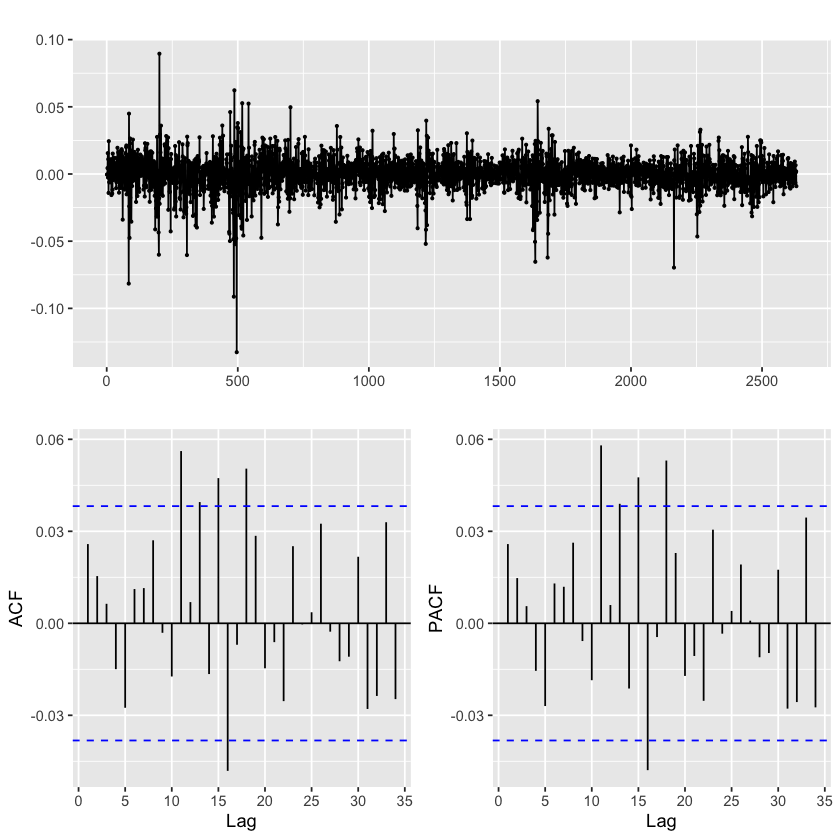

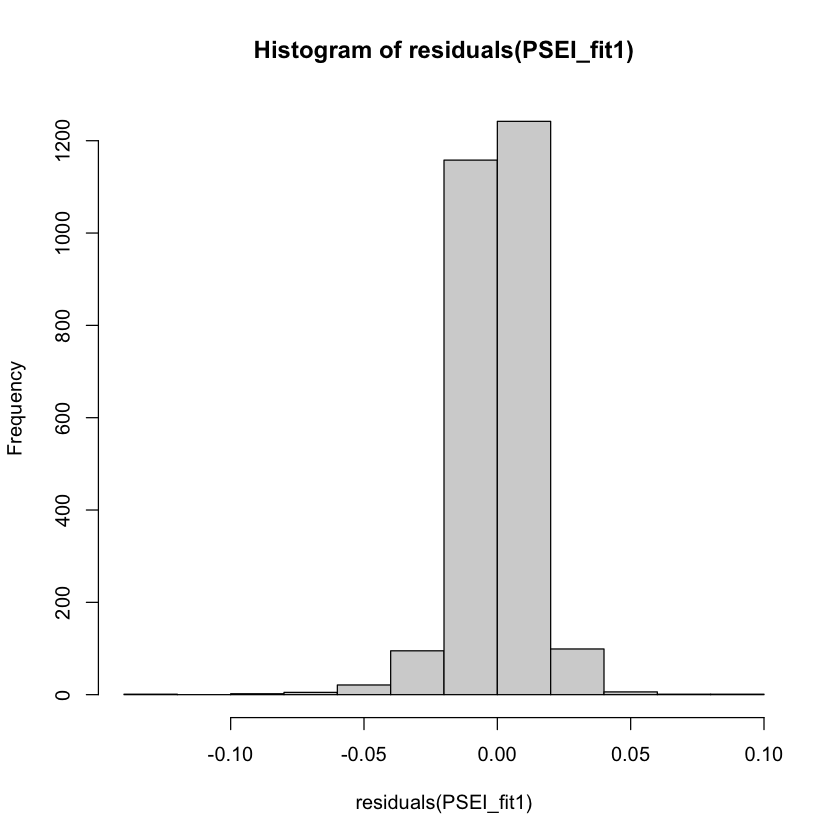

In [111]:
ggtsdisplay(residuals(PSEI_fit1))
hist(residuals(PSEI_fit1))

2) Based on the model in (1), show a plot of the forecasted mean and variance of psei_ret for
the test data added into the plot of the full dataset. Analyze the plots. (1)

Log returns are applied to the actual values. Prediction intervals almost capture the volatility of the dataset. Best model (2, 2) is slight better than (1, 1) based on the information criteria values. The point forecast seems to be going constant over the horizon, as well as the prediction intervals.

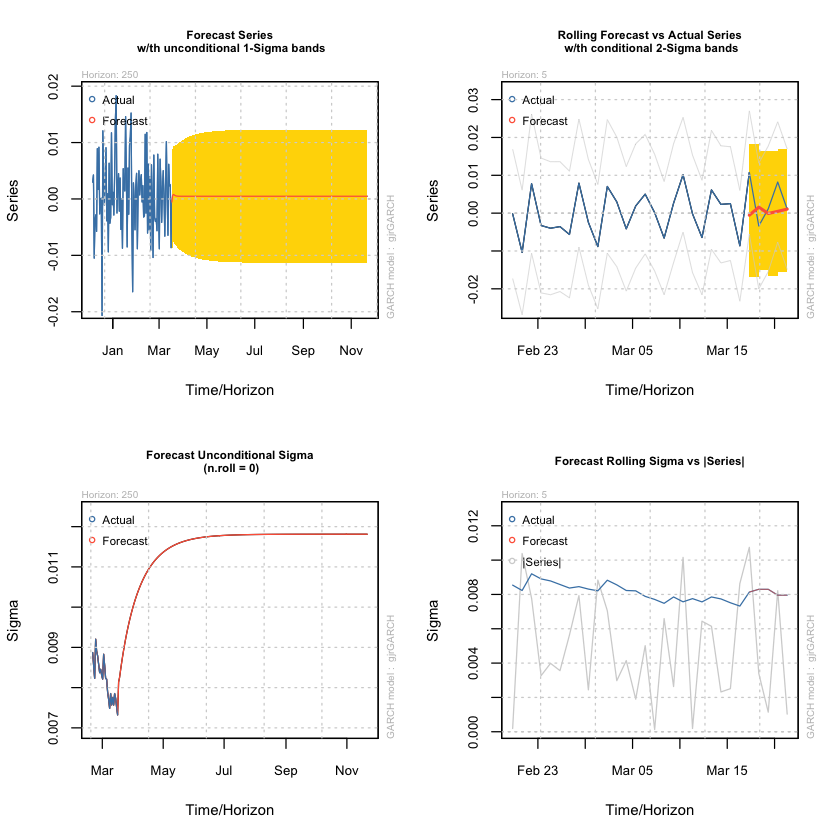

In [8]:
PSEI_forecast <- ugarchforecast(PSEI_fit1, 
                         data = NULL, 
                         n.ahead = 250, 
                         n.roll = 5, 
                         out.sample = 0,
                         external.forecasts = list(mregfor = NULL, vregfor = NULL))

plot(PSEI_forecast, which = "all")

In [6]:
PSEI_forecast


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: gjrGARCH
Horizon: 250
Roll Steps: 5
Out of Sample: 250

0-roll forecast [T0=1977-03-16 08:00:00]:
          Series    Sigma
T+1   -0.0005388 0.008138
T+2    0.0006443 0.008257
T+3    0.0007933 0.008441
T+4    0.0007132 0.008614
T+5    0.0006207 0.008776
T+6    0.0005573 0.008929
T+7    0.0005204 0.009072
T+8    0.0005005 0.009207
T+9    0.0004904 0.009335
T+10   0.0004853 0.009455
T+11   0.0004828 0.009569
T+12   0.0004817 0.009677
T+13   0.0004811 0.009778
T+14   0.0004808 0.009875
T+15   0.0004807 0.009966
T+16   0.0004807 0.010053
T+17   0.0004806 0.010135
T+18   0.0004806 0.010213
T+19   0.0004806 0.010288
T+20   0.0004806 0.010358
T+21   0.0004806 0.010425
T+22   0.0004806 0.010489
T+23   0.0004806 0.010549
T+24   0.0004806 0.010607
T+25   0.0004806 0.010662
T+26   0.0004806 0.010714
T+27   0.0004806 0.010764
T+28   0.0004806 0.010811
T+29   0.0004806 0.0108

3) Generate the accuracy measures of the selected model in (1) with respect to the testing
dataset. Write a short analysis based on the accuracy measures.

In [109]:
fpm(PSEI_forecast)

,1977-03-16 08:00:00,1977-03-17 08:00:00,1977-03-18 08:00:00,1977-03-19 08:00:00,1977-03-20 08:00:00,1977-03-21 08:00:00
MSE,9.200501e-05,9.192599e-05,9.219428e-05,9.255106e-05,9.263451e-05,9.301302e-05
MAE,7.447101e-03,7.441249e-03,7.450986e-03,7.475934e-03,7.471141e-03,7.501502e-03
DAC,5.120000e-01,5.140562e-01,5.120968e-01,5.141700e-01,5.121951e-01,5.102041e-01
N,2.500000e+02,2.490000e+02,2.480000e+02,2.470000e+02,2.460000e+02,2.450000e+02


MSE value measures the amount of dispersion of the errors, which also means that smaller MSE value the better. For the MSE above, MSE values are significantly low. Same with MSE, relatively smaller MAE values are better. MAE equals to zero indicates no error in the forecasted values. To sum it up, chosen model seems to be performing well based on its accuracy measures. However, I believe that further tweaking of the specification and fit of the model would be recommended.